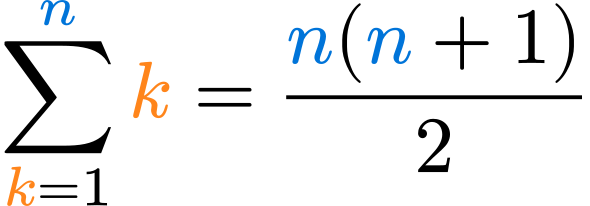

In [14]:
from pathlib import Path
import typst
from IPython.display import SVG, display

temp_dir = Path.cwd()
typst_file = temp_dir / "step1.typ"
svg_file = temp_dir / "step1.svg"

file_content = """
#set page(width: auto, height: auto, margin: 0cm, fill: none)
#set text(size: 80pt)

#let korange() = text(fill: orange)[$k$]
#let nblue() = text(fill: blue)[$n$]

$ sum_(#korange() = 1)^#nblue() #korange() = (nblue()(nblue()+1)) / 2 $  
"""

typst_file.write_text(file_content)
typst.compile(typst_file, format="svg", output=str(svg_file))
display(SVG(filename=str(svg_file)))

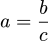

In [19]:
from pathlib import Path
import typst
from IPython.display import SVG, display

temp_dir = Path.cwd()
typst_file = temp_dir / "step1.typ"
svg_file = temp_dir / "step1.svg"

file_content = """
#set page(width: auto, height: auto, margin: 0cm, fill: none)
#set text(size: 20pt)

$ a= b/c $  
"""

typst_file.write_text(file_content)
typst.compile(typst_file, format="svg", output=str(svg_file))
display(SVG(filename=str(svg_file)))

In [20]:
step1_content = svg_file.read_text()
print(step1_content)

<svg class="typst-doc" viewBox="0 0 50.41111111111111 41.36" width="50.41111111111111pt" height="41.36pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:h5="http://www.w3.org/1999/xhtml">
    <g>
        <g transform="translate(0 27.42)">
            <g class="typst-text" transform="scale(1, -1)">
                <use xlink:href="#g7C8D781A91ACC91E5F4E2AFEA09CD2AC" x="0" fill="#000000" fill-rule="nonzero"/>
            </g>
        </g>
        <g transform="translate(16.135555555555555 27.42)">
            <g class="typst-text" transform="scale(1, -1)">
                <use xlink:href="#gB487FD0F6DEACBCC4D85D0A024B8CBD5" x="0" fill="#000000" fill-rule="nonzero"/>
            </g>
        </g>
        <g transform="translate(39.40111111111111 13.879999999999999)">
            <g class="typst-text" transform="scale(1, -1)">
                <use xlink:href="#g73939EB408560F2987E67CB4F80610E0" x="0" fill="#000000" fill-rule="nonzero"/>
            </g>

In [21]:
def simplify_svg(step1_content):
    from lxml import etree
    
    # Define namespaces used in the SVG.
    ns = {
        'svg': 'http://www.w3.org/2000/svg',
        'xlink': 'http://www.w3.org/1999/xlink'
    }
    
    # Parse the SVG.
    tree = etree.fromstring(step1_content)
    
    # Build a dictionary mapping symbol IDs to the symbol elements.
    symbols = {}
    for symbol in tree.xpath('//svg:defs/svg:symbol', namespaces=ns):
        symbol_id = symbol.get('id')
        symbols[symbol_id] = symbol
    
    # Process each <use> element.
    for use in tree.xpath('//svg:use', namespaces=ns):
        href = use.get('{http://www.w3.org/1999/xlink}href')
        if href and href.startswith('#'):
            symbol_id = href[1:]
            symbol = symbols.get(symbol_id)
            if symbol is not None:
                # For simplicity, assume the symbol contains a single <path>.
                path = symbol.find('{http://www.w3.org/2000/svg}path')
                if path is not None:
                    # Create a new <path> element.
                    new_path = etree.Element('{http://www.w3.org/2000/svg}path')
                    # Copy the "d" attribute from the symbol's <path>.
                    new_path.set('d', path.get('d'))
                    # Copy attributes from the <use> element (like fill and fill-rule).
                    for attr in ['fill', 'fill-rule']:
                        value = use.get(attr)
                        if value:
                            new_path.set(attr, value)
                    # Replace the <use> element with the new <path>.
                    parent = use.getparent()
                    parent.replace(use, new_path)
    
    # Remove the <defs> section since it's no longer needed.
    for defs in tree.xpath('//svg:defs', namespaces=ns):
        parent = defs.getparent()
        parent.remove(defs)
    
    # Optionally, remove extra attributes from the root <svg>.
    allowed_attribs = ['viewBox', 'width', 'height', 'xmlns']
    for attr in list(tree.attrib.keys()):
        if attr not in allowed_attribs:
            del tree.attrib[attr]
    
    # Convert the modified SVG tree back to a string and return it.
    step2_content = etree.tostring(tree, pretty_print=True, encoding='unicode')
    return step2_content

step2_content = simplify_svg(step1_content)
print(step2_content)

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:h5="http://www.w3.org/1999/xhtml" viewBox="0 0 50.41111111111111 41.36" width="50.41111111111111pt" height="41.36pt">
    <g>
        <g transform="translate(0 27.42)">
            <g class="typst-text" transform="scale(1, -1)">
                <path d="M 9.96 2.8799999 C 9.96 3.06 9.86 3.1599998 9.639999 3.1599998 C 9.48 3.1599998 9.36 3.02 9.3 2.74 C 8.9 1.16 8.42 0.35999998 7.8799996 0.35999998 C 7.54 0.35999998 7.3599997 0.64 7.3599997 1.1999999 C 7.3599997 1.4599999 7.44 1.9399999 7.62 2.6399999 L 8.76 7.14 C 8.86 7.52 8.9 7.74 8.9 7.8399997 C 8.9 8.24 8.679999 8.44 8.24 8.44 C 7.8199997 8.44 7.54 8.2 7.3999996 7.74 C 6.98 8.48 6.3799996 8.84 5.62 8.84 C 4.3199997 8.84 3.1799998 8.179999 2.18 6.8599997 C 1.26 5.62 0.79999995 4.3399997 0.79999995 3 C 0.79999995 1.26 1.8199999 -0.22 3.5 -0.22 C 4.36 -0.22 5.2 0.24 6 1.16 C 6.22 0.39999998 6.8999996 -0.22 7.8399997 -0.22 C 9.22 -0.22 9.639999 1.4

In [22]:
from lxml import etree
from pathlib import Path

def create_thick_line_path(x1, y1, x2, y2, thickness):
    """
    Create a path that represents a thick horizontal line as a rectangle.
    The line goes from (x1,y1) to (x2,y2) with given thickness.
    """
    # Half thickness to extend above and below the line
    half_thickness = thickness / 2
    
    # Create a simple rectangle
    path_d = (f"M {x1} {y1-half_thickness} "     # Start at top-left
             f"L {x2} {y2-half_thickness} "      # Line to top-right
             f"L {x2} {y2+half_thickness} "      # Line to bottom-right
             f"L {x1} {y1+half_thickness} "      # Line to bottom-left
             f"Z")                               # Close the path
    
    return path_d

def process_svg(svg_content):
    """Process the SVG content and convert stroked paths to filled paths."""
    # Parse the SVG string
    parser = etree.XMLParser(remove_blank_text=True)
    svg_root = etree.fromstring(svg_content.strip(), parser)
    
    # Find all paths that have a stroke-width
    for path in svg_root.findall(".//*[@stroke-width]"):
        # Get the original path data and stroke width
        original_d = path.get('d')
        stroke_width = float(path.get('stroke-width'))
        
        # Parse the path data to get coordinates
        parts = original_d.strip().split()
        if len(parts) >= 6 and parts[0] == 'M' and parts[3] == 'L':
            x1, y1 = float(parts[1]), float(parts[2])
            x2, y2 = float(parts[4]), float(parts[5])
            
            # Create new path attributes
            path.set("d", create_thick_line_path(x1, y1, x2, y2, stroke_width))
            path.set("fill", path.get('stroke', '#000000'))  # Use stroke color as fill
            
            # Remove stroke attributes
            for attr in ['stroke', 'stroke-width', 'stroke-linecap', 'stroke-linejoin', 'stroke-miterlimit']:
                if attr in path.attrib:
                    del path.attrib[attr]
            
            # Make sure there's no 'fill' attribute set to 'none'
            if path.get('fill') == 'none':
                path.set('fill', '#000000')
    
    return etree.tostring(svg_root, pretty_print=True, encoding='unicode')

step3_content = process_svg(step2_content)
print(step3_content)

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:h5="http://www.w3.org/1999/xhtml" viewBox="0 0 50.41111111111111 41.36" width="50.41111111111111pt" height="41.36pt">
  <g>
    <g transform="translate(0 27.42)">
      <g class="typst-text" transform="scale(1, -1)">
        <path d="M 9.96 2.8799999 C 9.96 3.06 9.86 3.1599998 9.639999 3.1599998 C 9.48 3.1599998 9.36 3.02 9.3 2.74 C 8.9 1.16 8.42 0.35999998 7.8799996 0.35999998 C 7.54 0.35999998 7.3599997 0.64 7.3599997 1.1999999 C 7.3599997 1.4599999 7.44 1.9399999 7.62 2.6399999 L 8.76 7.14 C 8.86 7.52 8.9 7.74 8.9 7.8399997 C 8.9 8.24 8.679999 8.44 8.24 8.44 C 7.8199997 8.44 7.54 8.2 7.3999996 7.74 C 6.98 8.48 6.3799996 8.84 5.62 8.84 C 4.3199997 8.84 3.1799998 8.179999 2.18 6.8599997 C 1.26 5.62 0.79999995 4.3399997 0.79999995 3 C 0.79999995 1.26 1.8199999 -0.22 3.5 -0.22 C 4.36 -0.22 5.2 0.24 6 1.16 C 6.22 0.39999998 6.8999996 -0.22 7.8399997 -0.22 C 9.22 -0.22 9.639999 1.4 9.96 2.8799999 Z M 

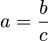

In [23]:

# Save the modified SVG
output_file = Path.cwd() / "final.svg"
output_file.write_text(step3_content)

from IPython.display import SVG, display
display(SVG(filename=str(output_file)))